In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [16]:
def h0_lasso(Y):
    total_length = len(Y)
    total_mean = pd.DataFrame(Y).mean()[0]
    
    Y_event = Y[-1]
    
    Y_pre = Y[0:(total_length-1)]
    sd_pre = pd.DataFrame(Y_pre).std()[0]
    Y_pre_mean = pd.DataFrame(Y_pre).mean()[0]
    
    pen_parameter = (1.65/sd_pre)*((total_length-1)/total_length)**0.5
    
    if pen_parameter > (Y_event - total_mean):
        return [total_mean,0]
    
    else:
        return [ Y_pre_mean - (pen_parameter/(total_length-1) ) , Y_event - Y_pre_mean - pen_parameter*( (total_length-2)/(total_length-1)) ]

In [17]:
def mean_nonzero_payment(effect_size, sample_size, std, number_sims):
    outcome_df = pd.DataFrame(columns = ['lasso_payment'])
    
    for r in range(0,number_sims):
        Y = list(np.random.normal(0,std**2,sample_size))
        Y_pre_mean = pd.DataFrame(Y).mean()[0]
    
        Y.append(np.random.normal(effect_size, std**2, 1)[0])
        outcome_df.loc[r] = [h0_lasso(Y)[1] ]
    
    non_zero_payments = outcome_df.query('lasso_payment >0')['lasso_payment'].mean()
    return non_zero_payments

In [18]:
def mean_nonzero_payment_ttest(effect_size, sample_size, std, number_sims):
    outcome_df = pd.DataFrame(columns = ['ttest_payment'])
    
    for r in range(0,number_sims):
        Y = list(np.random.normal(0,std**2,sample_size))
        Y_pre_mean = pd.DataFrame(Y).mean()[0]
        Y_pre_sd = pd.DataFrame(Y).std()[0]
    
        Y.append(np.random.normal(effect_size, std**2, 1)[0])
        Y_event = Y[-1]
        
        outcome_df.loc[r] = 0.0
        dif = Y_event - Y_pre_mean
        threshold = 1.65*(len(Y))**(.5)/Y_pre_sd
    
        if (dif > threshold):
            outcome_df.loc[r] = [dif]
    
    non_zero_payments = outcome_df.query('ttest_payment >0')['ttest_payment'].mean()
    return non_zero_payments

# Plots as sigma/effect size changes (for effect size =1) and n=9

In [45]:
sim_df = pd.DataFrame(columns = ['sigma'])

sim_df['sigma'] = np.linspace(1,3,20)
sim_df['h0_payment'] = sim_df['sigma'].apply(lambda s: mean_nonzero_payment(1, 9, s, 200))
sim_df['ttest_payment'] = sim_df['sigma'].apply(lambda s: mean_nonzero_payment_ttest(1, 9, s, 200))

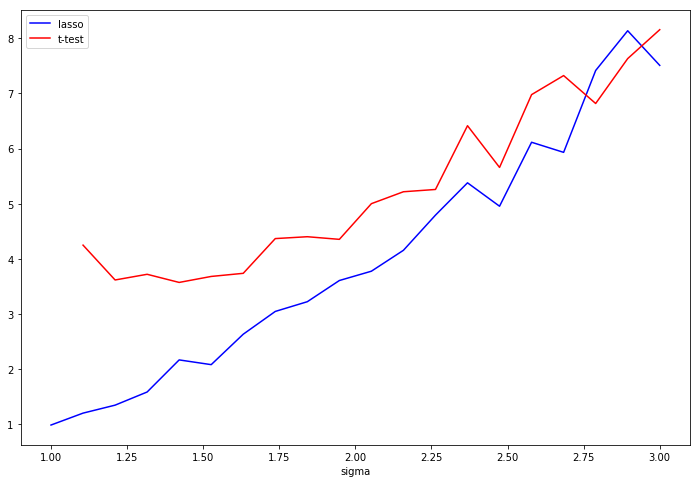

In [46]:
fig, ax = plt.subplots(figsize = (12,8))

# sim_df.plot.scatter(x='sigma', y='h0_payment', ax = ax, color = 'red', label ='lasso')
sim_df[['sigma','h0_payment']].plot(x='sigma',y='h0_payment',color ='blue', ax =ax, label = 'lasso')
sim_df[['sigma','ttest_payment']].plot(x='sigma',y='ttest_payment',color ='red', ax =ax, label = 't-test')
# sim_df.plot.scatter(x='sigma', y='ttest_payment', ax = ax, color = 'blue', label = 't-test')
# sim_df.plot.scatter(x='sigma', y='sigma', ax = ax, color = 'black', label = 'true effect')